In [1]:
!pip install pandas

  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 3.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.8 MB 4.6 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.8 MB 5.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.8 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.8/12.8 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.8 MB 5.1 MB/s eta 0:00:02
   -------------------------- ------------- 8.4/12.8 MB 5.3 MB


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("blood_donations_state.csv")

# 1. Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2. Drop rows with missing values
df.dropna(inplace=True)

# 3. Standardize formatting
df['state'] = df['state'].str.title()             # Capitalize state names
df['blood_type'] = df['blood_type'].str.upper()   # Capitalize blood types (A, B, AB, O, ALL)

# 4. Remove rows where blood_type == 'ALL' (aggregated totals)
df = df[df['blood_type'] != 'ALL']

# 5. Pivot the table: Each row is a date-state, each blood type becomes a column
df = df.pivot_table(
    index=['date', 'state'],
    columns='blood_type',
    values='donations',
    fill_value=0
).reset_index()

# Rename blood type columns
df.columns.name = None
df.rename(columns={'A': 'blood_a', 'B': 'blood_b', 'AB': 'blood_ab', 'O': 'blood_o'}, inplace=True)

# 6. Handle outliers using the IQR method for each blood type column
for col in ['blood_a', 'blood_b', 'blood_ab', 'blood_o']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Reset index
df.reset_index(drop=True, inplace=True)

# Show cleaned dataset shape
print("✅ Cleaned dataset shape:", df.shape)

# Preview cleaned data
print(df.head())


✅ Cleaned dataset shape: (77836, 6)
        date            state  blood_a  blood_ab  blood_b  blood_o
0 2006-01-01            Johor     19.0       3.0     20.0     45.0
1 2006-01-01         Kelantan      0.0       0.0      0.0      0.0
2 2006-01-01           Melaka      0.0       0.0      0.0      1.0
3 2006-01-01  Negeri Sembilan      0.0       0.0      0.0      0.0
4 2006-01-01           Pahang      0.0       0.0      0.0      0.0


In [4]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 686.3 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.1 MB 686.3 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 720.9 kB/s eta 0:00:11
   ----- ---------------------------------- 1.0/8.1 MB 789.6 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 823.7 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 875.1 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 925.8 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.1 MB 978.8 kB/s eta 0:00:07
   ------------ --------------------------- 2.6/8.1 MB 1.1 MB/s eta 0:00:06
   -------------- ------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Export the cleaned dataset to CSV
df.to_csv("cleaned_blood_donations.csv", index=False)

In [29]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 2.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.7 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.7 MB 1.6 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.7 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.7 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.7 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.7 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.7 MB 1.2 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.7 MB 1.2 MB/s eta 0:00:05
   -------------- --------

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv("cleaned_blood_donations.csv")

# 1. One-hot encode the 'state' column
df_encoded = pd.get_dummies(df, columns=['state'])

# 2. Select numeric features to scale
features_to_scale = ['blood_a', 'blood_b', 'blood_ab', 'blood_o']

# 3. Initialize and apply StandardScaler
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# 4. Optionally save the transformed dataset
df_encoded.to_csv("transformed_blood_donations.csv", index=False)

# Confirm the transformation
print("✅ Data transformation complete. Encoded and scaled dataset saved as 'transformed_blood_donations.csv'")
print(df_encoded.head())


✅ Data transformation complete. Encoded and scaled dataset saved as 'transformed_blood_donations.csv'
         date   blood_a  blood_ab   blood_b   blood_o  state_Johor  \
0  2006-01-01  0.599312 -0.004784  0.516771  1.320947         True   
1  2006-01-01 -1.085952 -0.980398 -1.097303 -1.134111        False   
2  2006-01-01 -1.085952 -0.980398 -1.097303 -1.079554        False   
3  2006-01-01 -1.085952 -0.980398 -1.097303 -1.134111        False   
4  2006-01-01 -1.085952 -0.980398 -1.097303 -1.134111        False   

   state_Kedah  state_Kelantan  state_Melaka  state_Negeri Sembilan  \
0        False           False         False                  False   
1        False            True         False                  False   
2        False           False          True                  False   
3        False           False         False                   True   
4        False           False         False                  False   

   state_Pahang  state_Perak  state_Pulau Pinang  

In [36]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_blood_donations.csv")

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check dataset structure
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

# 1. Descriptive statistics
print("\nDescriptive Statistics for Blood Donations:")
print(df[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].describe())

# 2. Top 10 states by number of records
print("\nTop 10 States by Record Count:")
print(df['state'].value_counts().head(10))

# 3. Time-based insights
print("\nDate Range:")
print(f"From {df['date'].min().date()} to {df['date'].max().date()}")

# Count records by year
df['year'] = df['date'].dt.year
print("\nTotal Records per Year (first 5):")
print(df['year'].value_counts().sort_index().head())

# Optional: Drop 'year' column after use
if 'year' in df.columns:
    df.drop(columns=['year'], inplace=True)


Dataset shape: (77836, 6)

Column names: ['date', 'state', 'blood_a', 'blood_ab', 'blood_b', 'blood_o']

Descriptive Statistics for Blood Donations:
            blood_a       blood_b      blood_ab       blood_o
count  77836.000000  77836.000000  77836.000000  77836.000000
mean      12.243242     13.596690      3.014710     20.787695
std       11.274272     12.391083      3.075007     18.329619
min        0.000000      0.000000      0.000000      0.000000
25%        3.000000      3.000000      0.000000      5.000000
50%       10.000000     11.000000      2.000000     17.000000
75%       19.000000     21.000000      5.000000     32.000000
max       64.000000     56.000000     12.000000     75.000000

Top 10 States by Record Count:
state
Negeri Sembilan    7039
Pahang             7016
Kelantan           6983
Terengganu         6917
Selangor           6599
Sabah              6571
Melaka             6393
Pulau Pinang       6256
Sarawak            6201
Johor              6002
Name: count, dt

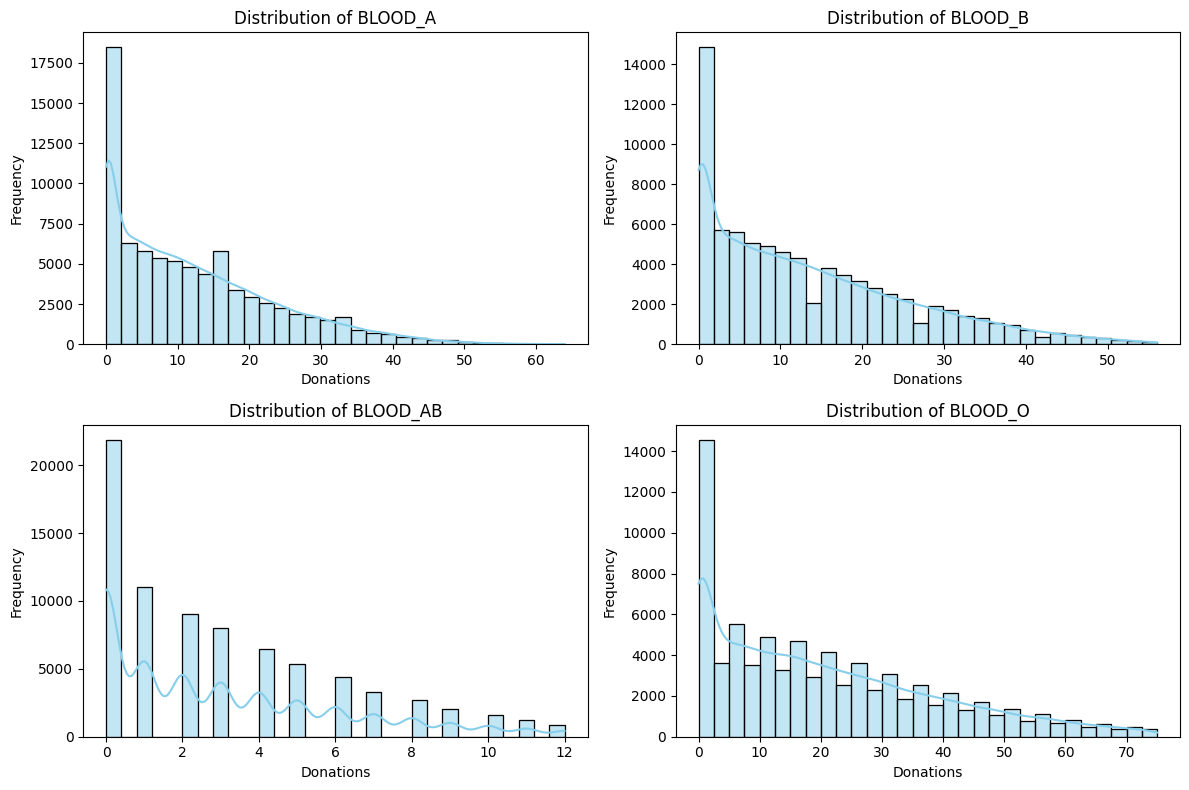

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_blood_donations.csv")

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define blood donation columns
blood_types = ['blood_a', 'blood_b', 'blood_ab', 'blood_o']
plt.figure(figsize=(12, 8))
for i, col in enumerate(blood_types):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col.upper()}")
    plt.xlabel("Donations")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


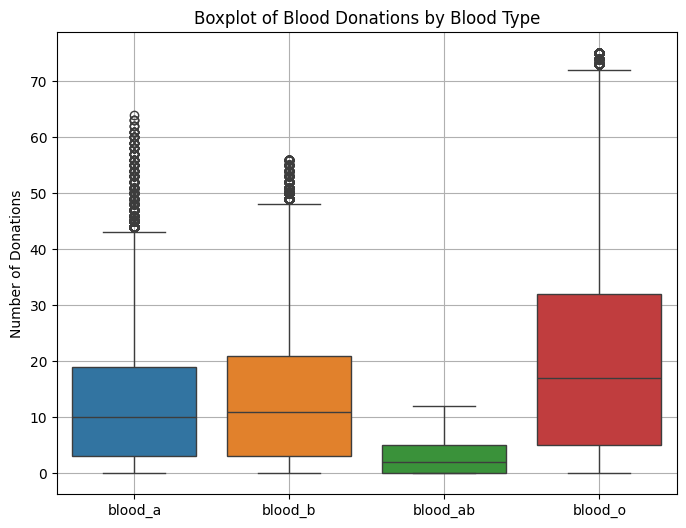

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[blood_types])
plt.title("Boxplot of Blood Donations by Blood Type")
plt.ylabel("Number of Donations")
plt.grid(True)
plt.show()


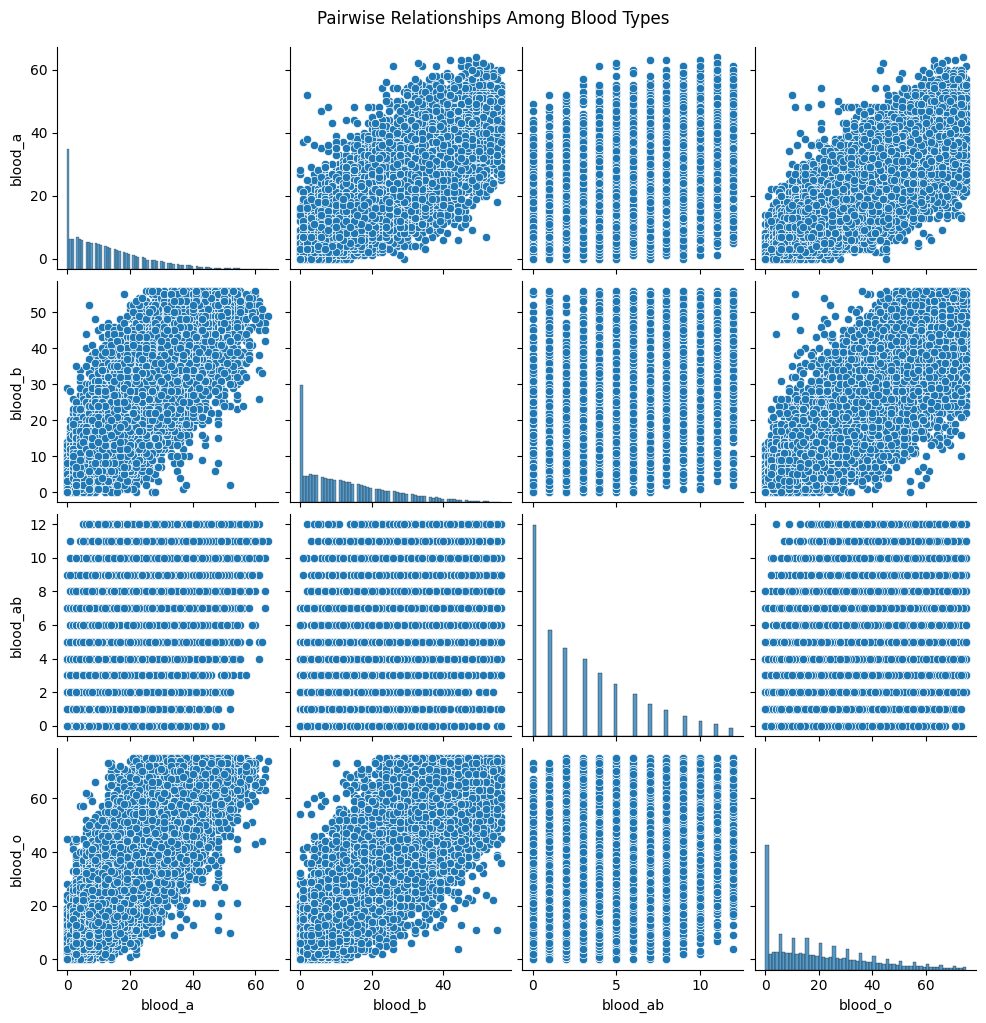

In [39]:
sns.pairplot(df[blood_types])
plt.suptitle("Pairwise Relationships Among Blood Types", y=1.02)
plt.show()


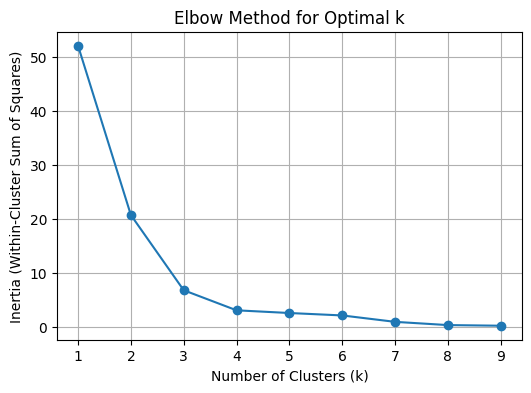

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load cleaned data
df = pd.read_csv("cleaned_blood_donations.csv")

# Step 2: Pivot (aggregate) data to state-level mean donations
df_state = df.groupby('state')[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].mean().reset_index()

# Step 3: Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_state[['blood_a', 'blood_b', 'blood_ab', 'blood_o']])

# Step 4: Find optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [41]:
# Apply KMeans with chosen number of clusters (e.g., k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_state['cluster'] = kmeans.fit_predict(X_scaled)

# View clustered result
print(df_state.sort_values('cluster'))


                state    blood_a    blood_b  blood_ab    blood_o  cluster
2            Kelantan   7.782901   8.053415  1.905342  11.812688        0
7        Pulau Pinang  10.435102  11.218191  2.515505  17.149776        0
5              Pahang   7.966078   8.790194  1.998575  12.615308        0
4     Negeri Sembilan   9.712459  10.637875  2.333286  16.465975        0
11         Terengganu   9.918462  11.376319  2.763192  15.879717        0
12  W.P. Kuala Lumpur  26.549206  28.577778  6.004762  44.252381        1
3              Melaka  15.001877  15.757078  3.660879  24.408728        2
1               Kedah  18.401866  20.661754  4.783396  29.016045        2
6               Perak  16.428012  18.292554  4.013801  27.092350        2
0               Johor  14.616961  16.495168  3.179440  25.582972        2
9             Sarawak  11.893727  14.581842  3.256733  20.532979        2
8               Sabah  12.683762  13.754071  2.770659  28.373003        2
10           Selangor  13.329444  15.1

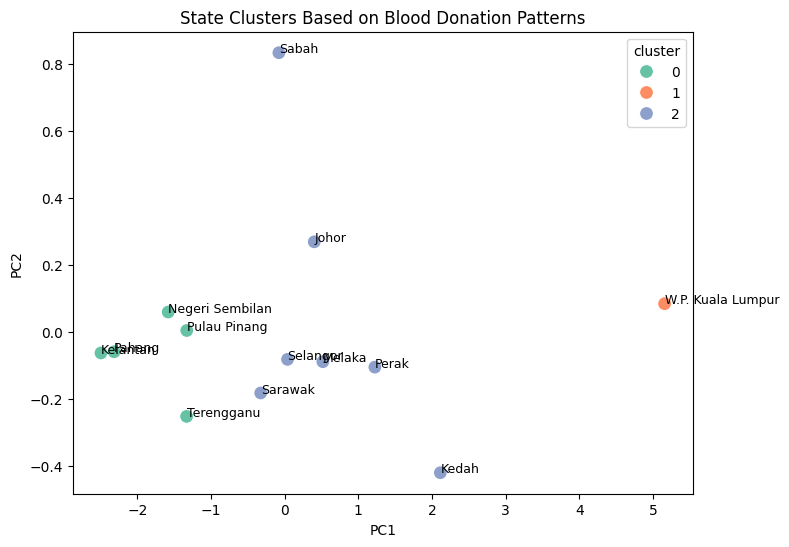

In [42]:
# 2D visualization with PCA (optional for better cluster display)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_state['PC1'] = X_pca[:, 0]
df_state['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_state, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
for i in range(len(df_state)):
    plt.text(df_state['PC1'][i], df_state['PC2'][i], df_state['state'][i], fontsize=9)
plt.title("State Clusters Based on Blood Donation Patterns")
plt.show()


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load the cleaned dataset
df = pd.read_csv("cleaned_blood_donations.csv")

# 2. Aggregate data: average donation by state for each blood type
df_state = df.groupby('state')[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].mean().reset_index()

# 3. Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df_state[['blood_a', 'blood_b', 'blood_ab', 'blood_o']])

# 4. Train the KMeans model (e.g., k=3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_state['cluster'] = kmeans.fit_predict(X)

# 5. Output trained model results
print("✅ Model trained. Here are the clustered states:")
print(df_state.sort_values('cluster'))

# Optional: Save model output
df_state.to_csv("state_clusters.csv", index=False)


✅ Model trained. Here are the clustered states:
                state    blood_a    blood_b  blood_ab    blood_o  cluster
2            Kelantan   7.782901   8.053415  1.905342  11.812688        0
7        Pulau Pinang  10.435102  11.218191  2.515505  17.149776        0
5              Pahang   7.966078   8.790194  1.998575  12.615308        0
4     Negeri Sembilan   9.712459  10.637875  2.333286  16.465975        0
11         Terengganu   9.918462  11.376319  2.763192  15.879717        0
12  W.P. Kuala Lumpur  26.549206  28.577778  6.004762  44.252381        1
3              Melaka  15.001877  15.757078  3.660879  24.408728        2
1               Kedah  18.401866  20.661754  4.783396  29.016045        2
6               Perak  16.428012  18.292554  4.013801  27.092350        2
0               Johor  14.616961  16.495168  3.179440  25.582972        2
9             Sarawak  11.893727  14.581842  3.256733  20.532979        2
8               Sabah  12.683762  13.754071  2.770659  28.373003

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load cleaned dataset
df = pd.read_csv("cleaned_blood_donations.csv")

# Aggregate average donations per state
df_state = df.groupby('state')[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].mean().reset_index()

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(df_state[['blood_a', 'blood_b', 'blood_ab', 'blood_o']])

# Train KMeans model with k=3 (or change to test different k)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Assign clusters back to DataFrame
df_state['cluster'] = clusters

# Evaluate using Silhouette Score
score = silhouette_score(X, clusters)
print(f"✅ Silhouette Score: {score:.4f}")
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k = {k} → Silhouette Score: {score:.4f}")



✅ Silhouette Score: 0.5146
k = 2 → Silhouette Score: 0.5446
k = 3 → Silhouette Score: 0.5146
k = 4 → Silhouette Score: 0.4888
k = 5 → Silhouette Score: 0.3359


Blood Donation Prediction and Blood Group Distribution Analysis (Modular & Explained)
# # -------------------------------------------------------------
# 📌 PART 2: PYTHON ANALYTICS – MARKDOWN (Modular + Innovative)
# -------------------------------------------------------------
### 📦 Step 0: Import Required Libraries
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
```

---

### 🧼 Step 1: Load and Clean the Dataset
```python
def load_and_clean(filepath):
    """
    Load and clean the dataset:
    - Converts 'date' to datetime format
    - Drops rows with missing values
    - Standardizes 'state' and 'blood_type' formats
    - Removes rows where blood_type is 'ALL'
    """
    df = pd.read_csv(filepath)
    df.dropna(inplace=True)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['state'] = df['state'].str.title()
    df['blood_type'] = df['blood_type'].str.upper()
    df = df[df['blood_type'] != 'ALL']
    return df
```

---

### 🔄 Step 2: Reshape the Data for Modeling
```python
def pivot_data(df):
    """
    Converts data from long format to wide format:
    - Each blood type becomes a separate column (blood_a, blood_b, etc.)
    - Fills missing values with 0
    """
    df = df.pivot_table(
        index=['date', 'state'],
        columns='blood_type',
        values='donations',
        fill_value=0
    ).reset_index()

    df.columns.name = None
    df.rename(columns={
        'A': 'blood_a',
        'B': 'blood_b',
        'AB': 'blood_ab',
        'O': 'blood_o'
    }, inplace=True)

    return df
```

---

### 📊 Step 3: Exploratory Data Analysis (EDA)
```python
def describe_donations(df):
    """
    Print descriptive statistics for each blood type.
    Helps identify trends, averages, and spread in the dataset.
    """
    print("🔍 Descriptive Statistics for Blood Donations:")
    print(df[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].describe())
```

---

### ⚖️ Step 4: Feature Scaling
```python
def scale_features(df, cols):
    """
    Scales numerical features using StandardScaler.
    This is important for distance-based algorithms like K-Means.
    """
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df[cols])
    return scaled
```

---

### 🤖 Step 5: K-Means Clustering
```python
def kmeans_cluster(X, k=3):
    """
    Fits a KMeans clustering model with k clusters.
    Returns:
    - Trained model
    - Cluster labels for each row in the dataset
    """
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    return model, labels
```

---

### 📈 Step 6: Evaluate the Clustering
```python
def evaluate_clustering(X, labels):
    """
    Evaluates cluster performance using the Silhouette Score.
    Score ranges from -1 (poor) to 1 (excellent).
    """
    score = silhouette_score(X, labels)
    print(f"✅ Silhouette Score: {score:.4f}")
    return score
```

---

### 🚨 Step 7: Innovation — Custom Anomaly Detector
```python
def detect_anomalies(df, cols):
    """
    Identifies outliers using the IQR method:
    - For each column, calculates Q1, Q3, and IQR
    - Flags values outside 1.5 * IQR as anomalies
    - Returns a DataFrame of anomalous rows
    """
    anomalies = pd.DataFrame()

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        anomalies = pd.concat([anomalies, outliers])

    return anomalies.drop_duplicates()
```

---

### 🧪 Step 8: Execute the Full Workflow
```python
def main():
    # Step 1: Load and clean dataset
    df_raw = load_and_clean("blood_donations_state.csv")

    # Step 2: Pivot for modeling
    df_clean = pivot_data(df_raw)

    # Step 3: EDA
    describe_donations(df_clean)

    # Step 4: Group by state and get average donations
    df_state = df_clean.groupby('state')[['blood_a', 'blood_b', 'blood_ab', 'blood_o']].mean().reset_index()

    # Step 5: Scale features
    features = ['blood_a', 'blood_b', 'blood_ab', 'blood_o']
    X_scaled = scale_features(df_state, features)

    # Step 6: Apply clustering
    model, labels = kmeans_cluster(X_scaled, k=3)
    df_state['cluster'] = labels

    # Step 7: Evaluate clustering
    evaluate_clustering(X_scaled, labels)

    # Step 8: Detect anomalies
    anomalies = detect_anomalies(df_clean, features)
    print(f"\n🚨 Total anomalies detected: {len(anomalies)}")

    # Step 9: Save outputs
    df_state.to_csv("state_clusters.csv", index=False)
    anomalies.to_csv("donation_anomalies.csv", index=False)
    print("\n✅ Results saved to 'state_clusters.csv' and 'donation_anomalies.csv'")
```

---

### ▶️ Run the Full Project Pipeline
```python
main()
```

---

### ✅ Output Summary
| File | Purpose |
|------|---------|
| `state_clusters.csv` | Contains each state's average donation levels and their assigned cluster |
| `donation_anomalies.csv` | Records with donation counts that are statistical outliers |
| *(optional)* `cleaned_blood_donations.csv` | Cleaned and pivoted version of the dataset |

---

### 💡 Innovation Highlight
This project includes a **custom anomaly detection module** using the **IQR method** to identify suspicious donation records. This adds analytical depth by helping detect errors or significant events in the dataset.
